In [ ]:
# this notebook process images rendered by mkturk
# 1) crop the image to get rid of the white bazel
# 2) split the dataset into train/val splits

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# crop images

In [13]:
data_path = f"../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_Baselmesh7_notexture/"
save_path = f"../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_Baselmesh7_notexture/"

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

## read & sort img filenames
all_filenames = []
# read img filenames
for filename in os.listdir(data_path):
    if filename[-4:]=='.png':
        all_filenames.append(filename)
# sort img filenames -> fix bug of sorting by value
all_filenames = sorted(all_filenames, key=lambda x: int(x.split("_")[-1][5:-4]))
all_filenames
print(len(all_filenames))

def crop_alpha(img):
    """
    Crop out the parts of the image where alpha value is zero.
    """
    alpha = img.split()[-1]  # Get the alpha channel
    bbox = alpha.getbbox()   # Get the bounding box of the non-zero alpha region
    cropped = img.crop(bbox) # Crop the image to the bounding box
    return cropped

from tqdm import tqdm
error_img_index_list = []
error_img_filename_list = []
for img_index, filename in tqdm(enumerate(all_filenames)):
    # read image
    try:
        img = Image.open(os.path.join(data_path, filename))
    except: # in case image file is corrupted
        print(f"problem with img {img_index}")
        error_img_index_list.append(img_index)
        error_img_filename_list.append(filename)
        continue
    # crop
    cropped_img = crop_alpha(img)
    # save
    cropped_img.save(os.path.join(save_path, filename), compress_type=3)
print("these images are corrupted:", error_img_index_list)

5000


5000it [04:11, 19.87it/s]


these images are corrupted: []
5000


5000it [03:55, 21.27it/s]


these images are corrupted: []
5000


5000it [04:14, 19.63it/s]


these images are corrupted: []
5000


5000it [04:26, 18.78it/s]


these images are corrupted: []
5000


5000it [03:46, 22.11it/s]


these images are corrupted: []
5000


5000it [03:37, 22.99it/s]

these images are corrupted: []


# split train/val

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import random

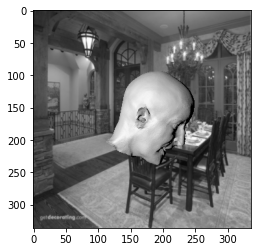

In [15]:
# sanity check - visualization 
trial_num = 190
im_path = '../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_Baselmesh0_notexture/canvasvisible_trialnum000_Sample_framenum000_label0_index0.png'
pil_im = Image.open(im_path).convert('RGB')
plt.imshow(pil_im)
plt.show()

In [57]:
identity = 'Baselmesh7_notexture'
input_dir = f'../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_{identity}/'
im_list = [os.path.join(input_dir, f) for f in sorted(os.listdir(input_dir)) if f[-4:]=='.png']
len(im_list), im_list[0]

(5000,
 '../../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_Baselmesh7_notexture/canvasvisible_trialnum500_Sample_framenum000_label1_index0.png')

In [58]:
# shuffle
random.shuffle(im_list)
im_list[0]

'../../data/face_data/vbsl_5k_basel/202305051_Var6vbsl_im5000_Baselmesh7_notexture/canvasvisible_trialnum571_Sample_framenum002_label1_index712.png'

In [59]:
train_im_list = im_list[:int(len(im_list)*0.9)]
test_im_list = im_list[int(len(im_list)*0.9):]
len(train_im_list), len(test_im_list)

(4500, 500)

In [ ]:
from tqdm import tqdm
import shutil

In [61]:
for im_filename in tqdm(train_im_list):
    shutil.move(im_filename, f'../data/face_data/vbsl_5k_basel/train/{identity}/')
for im_filename in tqdm(test_im_list):
    shutil.move(im_filename, f'../data/face_data/vbsl_5k_basel/val/{identity}/')

100%|██████████| 500/500 [00:00<00:00, 23488.29it/s]


# deal with corrupted images

In [ ]:
input_dir = '../data/vbsl_dist_50k/train/neptune/'
im_list = [os.path.join(input_dir, f) for f in sorted(os.listdir(input_dir)) if f[-4:]=='.png']
len(im_list), im_list[0]

In [ ]:
import os

# try to read each image using PIL, and remove corrupted images
error_img_name_list = []
for im_filename in tqdm(im_list):
    try: 
        img = Image.open(im_filename).convert("RGB")
    except:
        os.remove(im_filename)
        error_img_name_list.append(im_filename)
error_img_name_list

# imagenet

In [ ]:
# keep only 150 images for a imagenet class
# used for 2D control exp

In [ ]:
import os
import cv2

folder_path = '../data/imagenet/n02504458/'

assert os.path.exists(folder_path)

# List all files in the folder
file_list = os.listdir(folder_path)

# Filter the list to include only image files (e.g., JPG, PNG, etc.)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Sort the image files to process them in order
image_files.sort()

# Specify the number of images to keep (in your case, the first 150)
images_to_keep = 150

# Loop through the image files and delete the ones beyond the specified limit
for i, image_file in enumerate(image_files):
    if i >= images_to_keep:
        file_to_delete = os.path.join(folder_path, image_file)
        os.remove(file_to_delete)
        print(f"Deleted: {image_file}")

print("Done. All excess images deleted.")